Зададим функцию лагранжевой интерполяции, функции построения сетки, а так же функцию, значения которой нужно интерполировать.

In [69]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy

def lagrange(xval, xk, yk):
    """Language interpolation polynimial.
    xval is L(xval), xk and yk are list of observations
    """
    return sum(yk[k] * lagrange_k(xval, xk, k) for k in range(len(xk)))

def lagrange_k(xval, xk, k):
    result = 1
    for i in range(len(xk)):
        if i != k:
            result *= (xval - xk[i])
            result /= (xk[k] - xk[i])
    return result

def regular(N):
    regular_x = []
    regular_y = []
    if N % 2 == 0:
        for i in range(-N // 2, N // 2):
            regular_x.append((i + 0.5) / (N // 2 - 0.5))
            regular_y.append(f((i + 0.5) / (N // 2 - 0.5)))
    else:
        for i in range(-(N - 1) // 2, int(N / 2 + 0.5)):
            regular_x.append(i / (int((N - 2) / 2 + 0.5)))
            regular_y.append(f(i / int((N - 2) / 2 + 0.5)))
    return regular_x, regular_y

def chebyshev(N):
    chebyshev_x = []
    chebyshev_y = []
    for i in range(N):
        chebyshev_x.append(math.cos((2 * i + 1) / 2 / N * math.pi))
        chebyshev_y.append(f(math.cos((2 * i + 1) / 2 / N * math.pi)))
    return chebyshev_x, chebyshev_y

def f(x):
    return 1 / (25 * x ** 2 + 1)


Построим регулярную сетку из 7 точек на промежутке [-1:1] и проинтерполируем по значениям в узлах сетки.

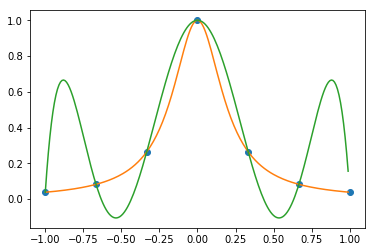

In [70]:
regular_x, regular_y = regular(7) 

figure, regular_plot= plt.subplots()
x = numpy.arange(-1, 1, 0.01)
regular_plot.plot(regular_x, regular_y, 'o')
regular_plot.plot(x, f(x))
regular_plot.plot(x, lagrange(x, regular_x, regular_y))
plt.show()


Теперь попробуем с четным количеством точек.

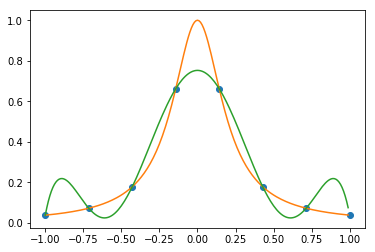

In [71]:
regular_x, regular_y = regular(8) 
    
figure, regular_plot= plt.subplots()
regular_plot.plot(regular_x, regular_y, 'o')
regular_plot.plot(x, f(x))
regular_plot.plot(x, lagrange(x, regular_x, regular_y))
plt.show()

Построим оптимальную сетку на том же отрезке с тем же количеством точек

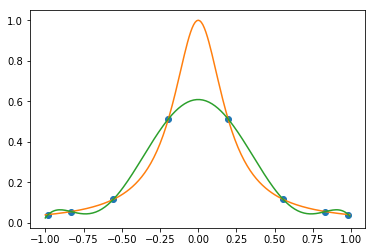

In [72]:
chebyshev_x, chebyshev_y = chebyshev(8)

figure, chebyshev_plot = plt.subplots()
x = numpy.arange(-1, 1, 0.01)
chebyshev_plot.plot(chebyshev_x, chebyshev_y, 'o')
chebyshev_plot.plot(x, f(x))
chebyshev_plot.plot(x, lagrange(x, chebyshev_x, chebyshev_y))
plt.show()

И с 7 точками

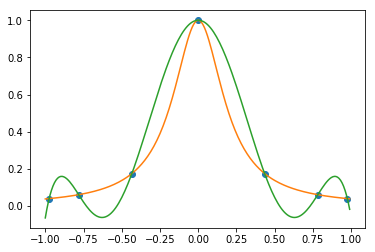

In [73]:
chebyshev_x, chebyshev_y = chebyshev(7)

figure, chebyshev_plot = plt.subplots()
x = numpy.arange(-1, 1, 0.01)
chebyshev_plot.plot(chebyshev_x, chebyshev_y, 'o')
chebyshev_plot.plot(x, f(x))
chebyshev_plot.plot(x, lagrange(x, chebyshev_x, chebyshev_y))
plt.show()

Посмотрим, как данные графики накладываются друг на друга на данном отрезке. (Светло-голубой график - это оптимальная сетка)

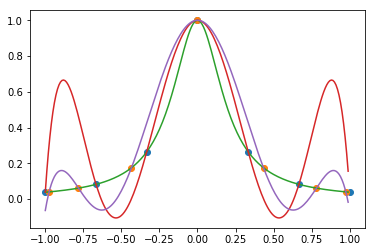

In [74]:
regular_x, regular_y = regular(7) 
chebyshev_x, chebyshev_y = chebyshev(7)

figure, plot= plt.subplots()
x = numpy.arange(-1, 1, 0.01)
plot.plot(regular_x, regular_y, 'o')
plot.plot(chebyshev_x, chebyshev_y, 'o')
plot.plot(x, f(x))
plot.plot(x, lagrange(x, regular_x, regular_y))
plot.plot(x, lagrange(x, chebyshev_x, chebyshev_y))
plt.show()

Теперь увеличим количество точек и интервал, на котором сравниваем полученные многочлены (теперь он [-1.1:1.1]

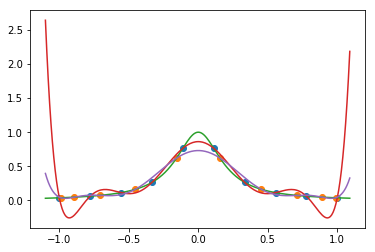

In [75]:
regular_x, regular_y = regular(10) 
chebyshev_x, chebyshev_y = chebyshev(10)

figure, plot= plt.subplots()
x = numpy.arange(-1.1, 1.1, 0.01)
plot.plot(regular_x, regular_y, 'o')
plot.plot(chebyshev_x, chebyshev_y, 'o')
plot.plot(x, f(x))
plot.plot(x, lagrange(x, regular_x, regular_y))
plot.plot(x, lagrange(x, chebyshev_x, chebyshev_y))
plt.show()

Вывод: многочлены Лагранжа, построенные по оптимальнорй сетке, значительно лучше приближают первоначальную функцию не только на интервале, для которого они были получены, но и вне его.